# Video Game Sale Trends Over The Decades

In [25]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv('vgsales.csv')
df_cleaned = df.dropna()
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


<p style="font-size:20px;">My dataset shows a list of different video games, the platform they are on, the year, genre, publisher and sales in different regions. They are also ranked from best selling to worst selling</p>

# Lab 3 Conclusions and findings

In [28]:
df_dropped = df.drop(columns=['Rank', 'Year'])
df_dropped.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


<p style="font-size:20px;">This is a summary of the numerical features of the dataset. Previously I stated in my original lab 3 notebook that this data does not have any missing but I have discovered that this is actually not true. Some of the data is missing, particular the sales features for certain regions. This is because some games are region specific and were not released for all regions. In this cases I will likely drop these rows to analyze the data when it makes sense to do so, if dropping these data points has significant contributions to my final conclusions I will mention it.</p>

## Research question: How have video game sales trends changed over the last 30 years across platforms and genres?
### Related Research Question 1: Which genres have grown or declined most in popularity over time?
### Related Research Question 2: What factors are most associated with a game's commercial success?

# Lab 4 Conclusions
<p style="font-size:20px;"></p>

In [15]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Optional: Drop any columns that won't be used in modeling (e.g., 'Name')
df_encoded = df_encoded.drop(columns=['Name'], errors='ignore')

# Improve display settings
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 3000)         # Prevent line wrapping
pd.set_option('display.max_rows', 20)        # Control max rows shown

# Transposed view to inspect the new features more easily
print("\n🔹 Transposed view of first 3 rows (easier to see all columns):")
print(df_encoded.head(20).T)


🔹 Transposed view of first 3 rows (easier to see all columns):
                                    0       1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19
Rank                                 1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20
Year                            2006.0  1985.0  2008.0  2009.0  1996.0  1989.0  2006.0  2006.0  2009.0  1984.0  2005.0  2005.0  1999.0  2007.0  2009.0  2010.0  2013.0  2004.0  1990.0  2005.0
NA_Sales                         41.49   29.08   15.85   15.75   11.27    23.2   11.38   14.03   14.59   26.93    9.07    9.81     9.0    8.94    9.09   14.97    7.01    9.43   12.78    4.75
EU_Sales                         29.02    3.58   12.88   11.01    8.89    2.26    9.23     9.2    7.06    0.63    11.0    7.57    6.18    8.03    8.59    4.94    9.27     0

In [9]:
# OPTIONAL: Drop columns not needed (you likely already dropped 'Name')
# df = df.drop(columns=['Name'], errors='ignore')

# Step 1: Define your features (X) and target (y)
X = df_encoded.drop(columns=['Global_Sales'])  # All features except the target
y = df_encoded['Global_Sales']                # Target variable

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔍 Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1.0 is better

# Optional: Check model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\n🔢 Feature Coefficients (Top 10):")
print(coefficients.sort_values(key=abs, ascending=False).head(10))


🔍 Linear Regression Evaluation:
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000

🔢 Feature Coefficients (Top 10):
JP_Sales                        1.000297
EU_Sales                        0.999987
NA_Sales                        0.999962
Other_Sales                     0.999870
Publisher_Magical Company       0.010942
Publisher_New                   0.010812
Publisher_Tetris Online         0.010716
Publisher_Jester Interactive    0.010670
Publisher_Liquid Games          0.010429
Publisher_NovaLogic             0.010360
dtype: float64


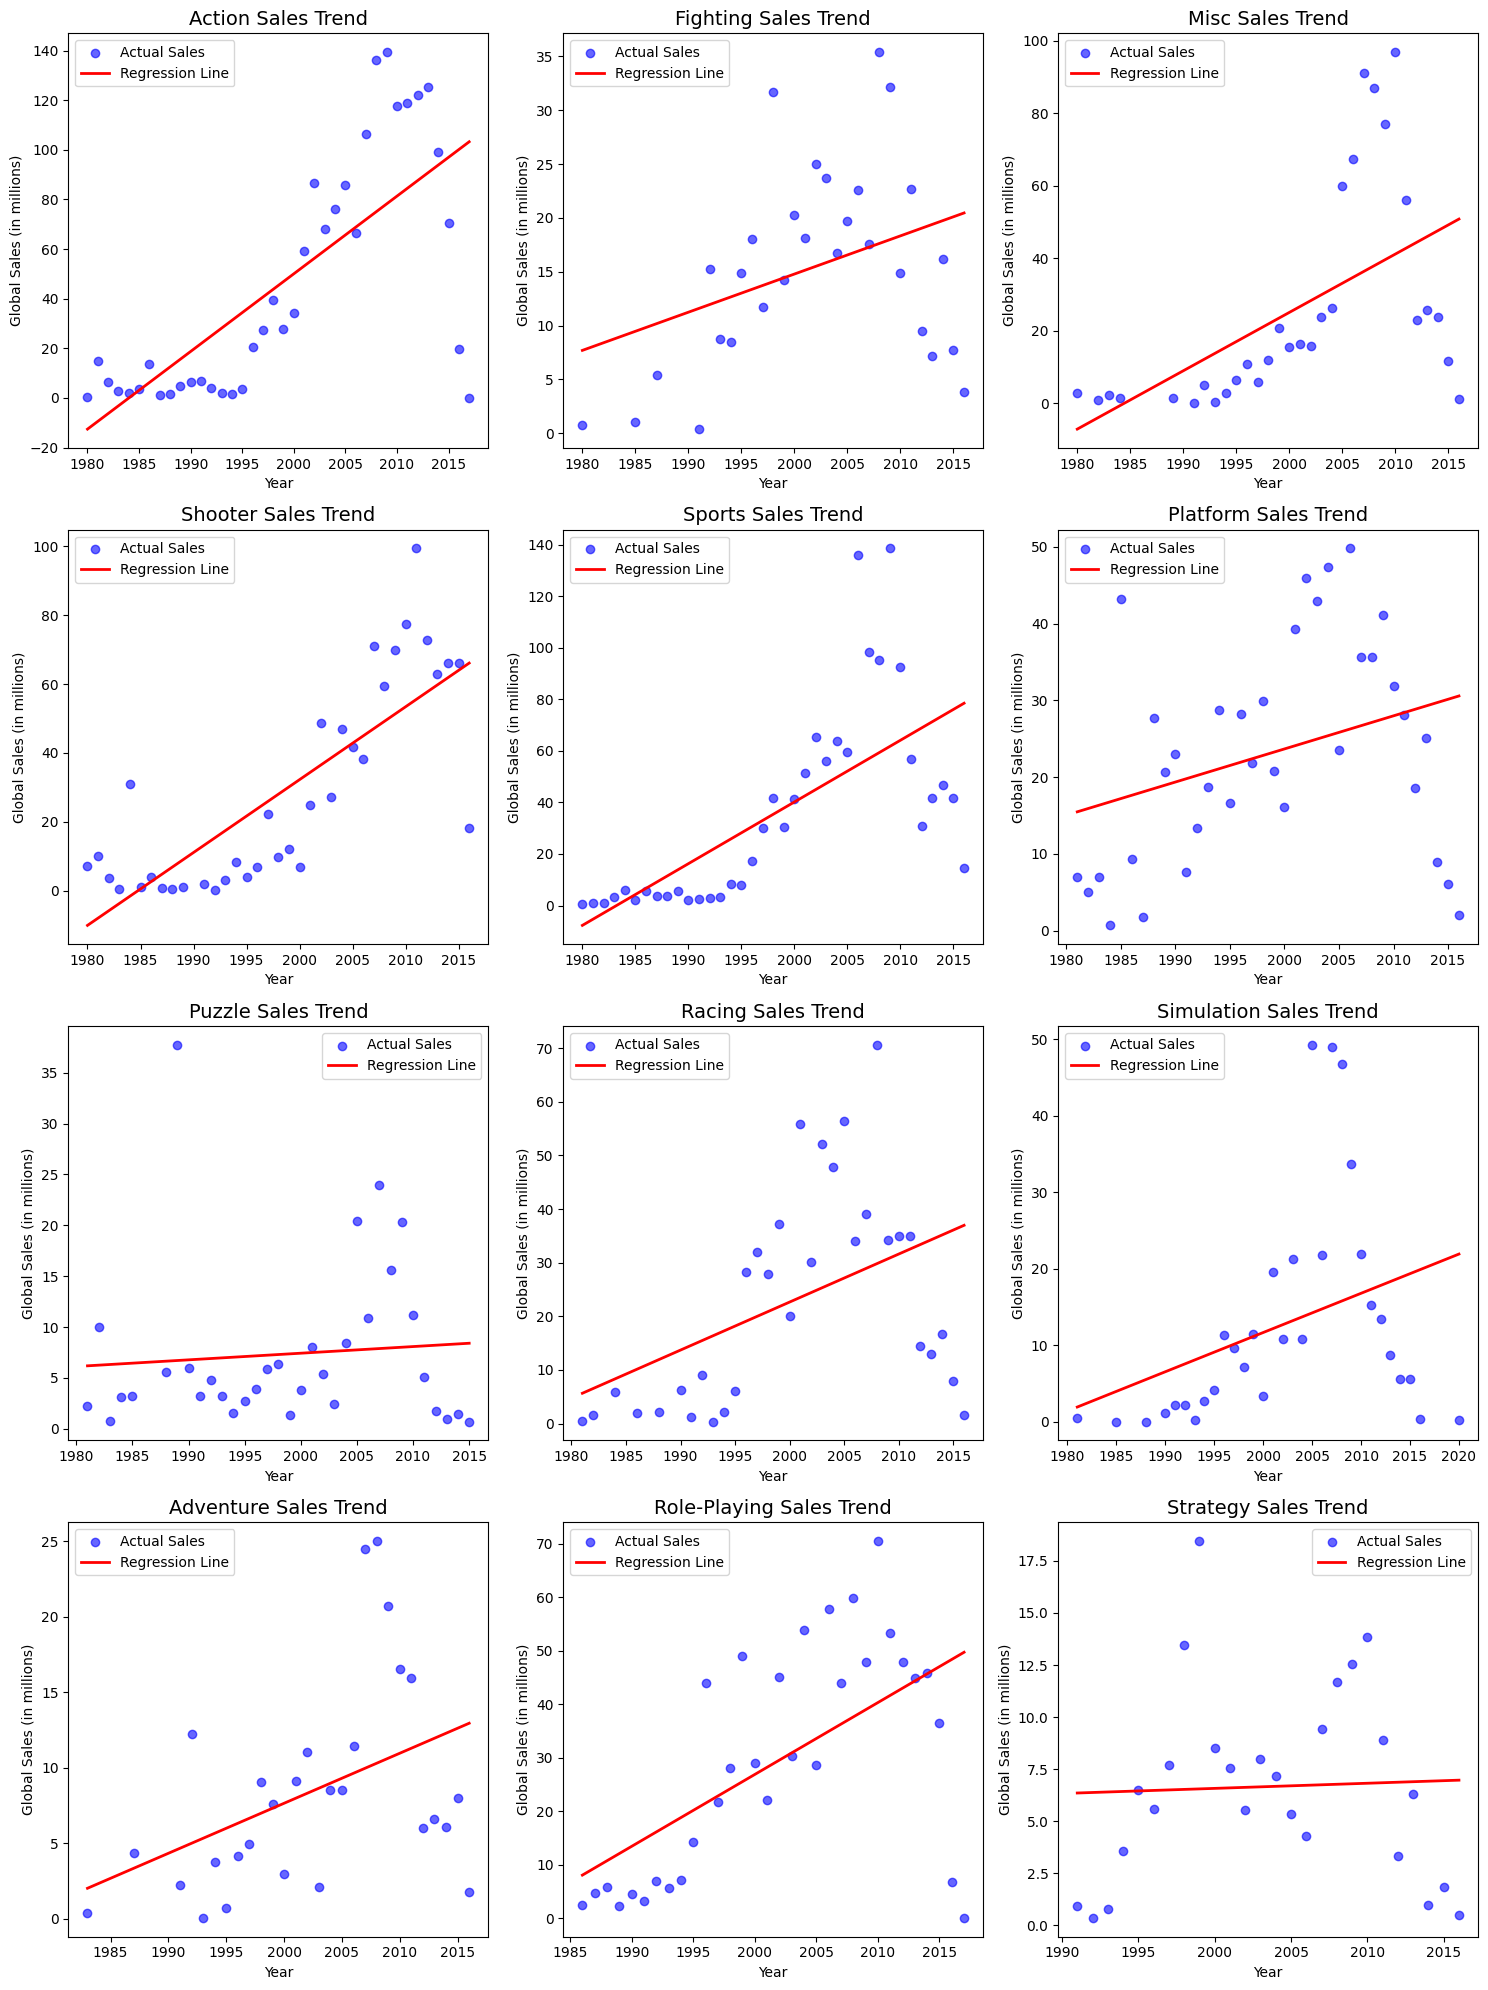

In [24]:
# Example: Aggregating by genre and year to get the total global sales for each combination
genre_sales = df_cleaned.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Get the unique genres
genres = genre_sales['Genre'].unique()

# Set up the figure with subplots (you can adjust the grid size as needed)
num_genres = len(genres)
rows = (num_genres // 3) + (1 if num_genres % 3 != 0 else 0)  # Create enough rows for the grid
cols = 3  # Set number of columns for the grid (adjust as necessary)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each genre and plot the linear regression for each
for i, genre in enumerate(genres):
    ax = axes[i]
    
    # Get the data for the current genre
    genre_data = genre_sales[genre_sales['Genre'] == genre]
    
    # Prepare data for linear regression
    X = genre_data[['Year']]  # Independent variable (year)
    y = genre_data['Global_Sales']  # Dependent variable (global sales)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict sales using the model
    y_pred = model.predict(X)
    
    # Plot the actual sales and regression line
    ax.scatter(genre_data['Year'], genre_data['Global_Sales'], label='Actual Sales', color='blue', alpha=0.6)
    ax.plot(genre_data['Year'], y_pred, label='Regression Line', color='red', linestyle='-', linewidth=2)
    
    # Set plot labels and title
    ax.set_title(f'{genre} Sales Trend', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Global Sales (in millions)')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
